In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import math

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False


In [3]:
# 배달 호출 데이터 (dlvr_call.csv)
deliv_data = pd.read_csv('dlvr_call.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# 데이터 전처리 (dicr_call.csv)
deliv_data['PROCESS_DT']=pd.to_datetime(deliv_data['PROCESS_DT'])
# deliv_data.index=deliv_data['PROCESS_DT']
deliv_data['year'] = pd.to_datetime(deliv_data['PROCESS_DT'].values).year
deliv_data['month'] = pd.to_datetime(deliv_data['PROCESS_DT'].values).month

deliv_data.drop(['SN','DLVR_REQUST_ENTRPS_ID','DLVR_RCEPT_ENTRPS_ID','DLVR_STORE_ID'],axis=1,inplace=True)
deliv_data.drop(['DLVR_STORE_LEGALDONG_CODE','DLVR_STORE_LI_NM','DLVR_STORE_ADSTRD_CODE','DLVR_STORE_RDNMADR_CODE'],axis=1,inplace=True)
deliv_data.drop(['DLVR_DSTN_LEGALDONG_CODE','DLVR_DSTN_LI_NM','DLVR_DSTN_ADSTRD_CODE','DLVR_DSTN_RDNMADR_CODE'],axis=1,inplace=True)
deliv_data.drop(['DLVR_MAN_ID'],axis=1,inplace=True)

deliv_data['SETLE_CARD_NM'].fillna('',inplace=True)
deliv_data.isna().sum()

PROCESS_DT                 0
DLVR_REQUST_STTUS_VALUE    0
DLVR_STORE_INDUTY_NM       0
DLVR_STORE_BRTC_NM         0
DLVR_STORE_SIGNGU_NM       0
DLVR_STORE_LEGALDONG_NM    0
DLVR_DSTN_BRTC_NM          0
DLVR_DSTN_SIGNGU_NM        0
DLVR_DSTN_LEGALDONG_NM     0
DLVR_DSTN_RDNMADR_CODE     0
DLVR_MAN_ID                0
DLVR_AMOUNT                0
CALL_RLAY_FEE_AMOUNT       0
GOODS_AMOUNT               0
SETLE_KND_VALUE            0
SETLE_CARD_NM              0
DLVR_RCEPT_TIME            0
DLVR_CARALC_TIME           0
DLVR_RECPT_TIME            0
DLVR_COMPT_TIME            0
DLVR_CANCL_TIME            0
year                       0
month                      0
dtype: int64

In [13]:
colors=['r','g','b','c','m','k']
sizes=15
deliv_data.head(4)

,PROCESS_DT,DLVR_REQUST_STTUS_VALUE,DLVR_STORE_INDUTY_NM,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_AMOUNT,...,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,year,month
PROCESS_DT,,,,,,,,,,,,,,,,,,,,,
2019-12-01,2019-12-01,1,족발/보쌈,서울특별시,영등포구,신길동,서울특별시,동작구,대방동,3300,...,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N,2019,12
2019-12-01,2019-12-01,1,치킨,경기도,고양시 일산동구,중산동,경기도,고양시 일산동구,중산동,2900,...,21900,1,승인:현대카드사,2019-12-01 21:58:07,2019-12-01 22:01:06,2019-12-01 22:20:53,2019-12-01 22:26:01,\N,2019,12
2019-12-01,2019-12-01,1,치킨,경기도,의정부시,의정부동,경기도,의정부시,녹양동,3500,...,19500,2,,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N,2019,12
2019-12-01,2019-12-01,1,돈까스/일식,경기도,고양시 일산동구,장항동,경기도,고양시 일산동구,마두동,3500,...,18000,2,,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57,\N,2019,12


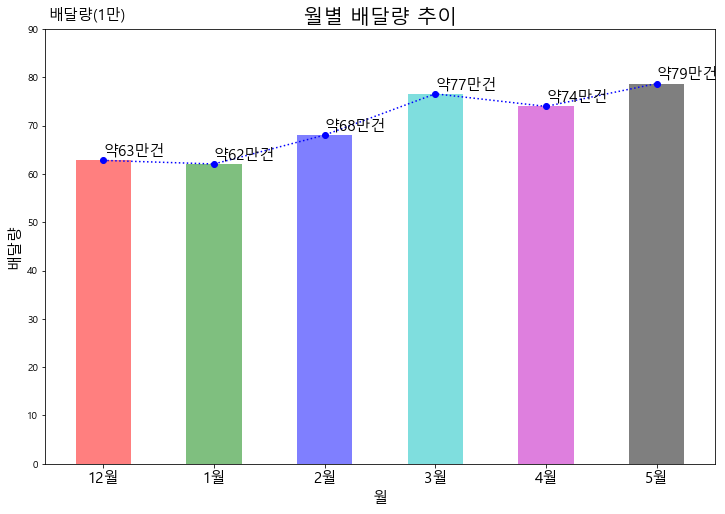

In [11]:
# 월별 배달량 추이 분석.
month_by=deliv_data[deliv_data['DLVR_REQUST_STTUS_VALUE']==1].groupby('month')['DLVR_REQUST_STTUS_VALUE'].count()
month_by=month_by.reindex([12,1,2,3,4,5])
month_by.index=['12월','1월','2월','3월','4월','5월']

plt.figure(figsize=(12,8))
plt.bar(month_by.index,month_by.values/10000,color=colors,width=0.5,alpha=0.5)
plt.xlabel('월',size=15)
plt.xticks(month_by.index,size=15)
plt.ylabel('배달량',size=15)
plt.ylim(0,90)
plt.title('월별 배달량 추이',size=20)
plt.text(-0.5,92,'배달량(1만)',size=15)

plt.plot(range(6),month_by.values/10000,':bo')

index_text=pd.Series(month_by.values).apply(lambda x : round(x/10000))
for x,y,name in zip(range(6),month_by.values/10000,index_text):
    plt.text(x,y+1,'약'+str(name)+'만건',size=15)
plt.show()


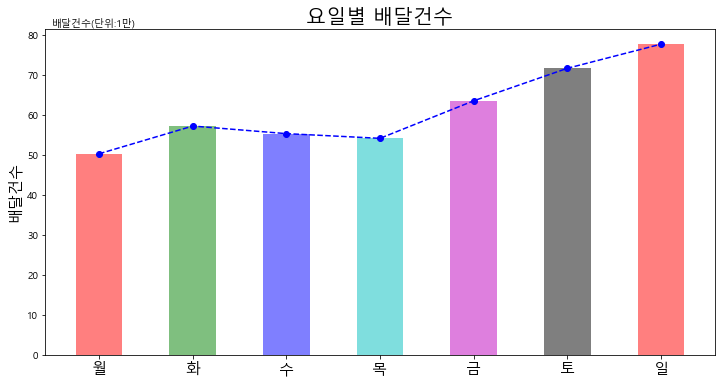

In [14]:
week_count=deliv_data['PROCESS_DT'].index.weekday.value_counts()
week_count=week_count.reindex([0,1,2,3,4,5,6])
weekday=['월','화','수','목','금','토','일']

plt.figure(figsize=(12,6))
plt.bar(range(7),week_count.values/10000,color=colors,alpha=0.5,width=0.5)
plt.title('요일별 배달건수',size=sizes+5)
plt.xticks(range(7),weekday,size=sizes)
plt.ylabel('배달건수',size=sizes)
plt.text(-0.5,82,'배달건수(단위:1만)')

plt.plot(range(7),week_count.values/10000,'--bo')

plt.show()

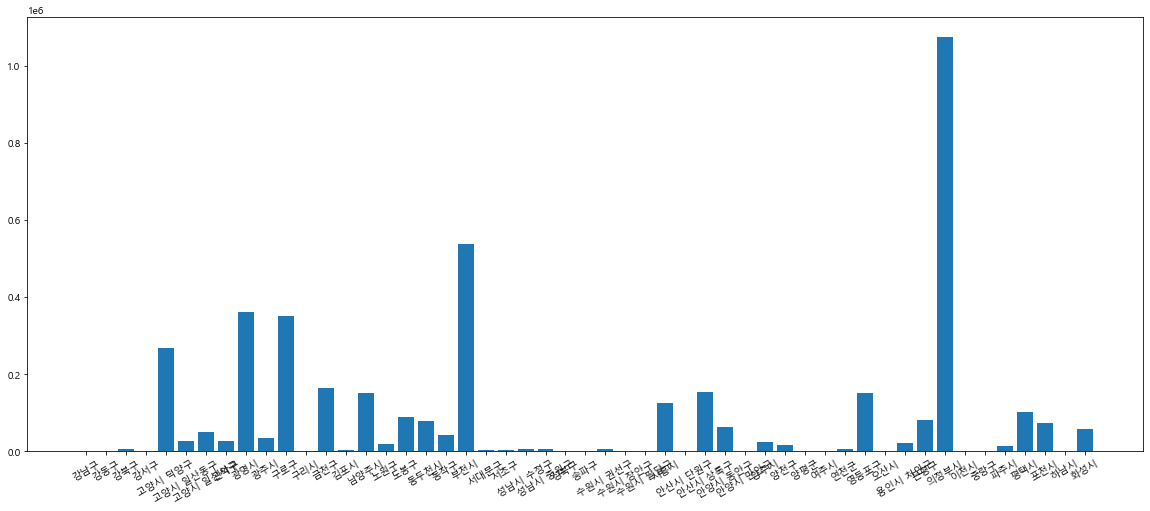

In [15]:
# 지역별 배달량(상점기준) 분석.
len(deliv_data['DLVR_STORE_SIGNGU_NM'].unique())
region_by_store = deliv_data[deliv_data['DLVR_REQUST_STTUS_VALUE']==1].groupby('DLVR_STORE_SIGNGU_NM')['DLVR_REQUST_STTUS_VALUE'].count()
region_by_store

plt.figure(figsize=(20,8))
plt.bar(region_by_store.index,region_by_store.values)
plt.xticks(rotation=30)
plt.show()

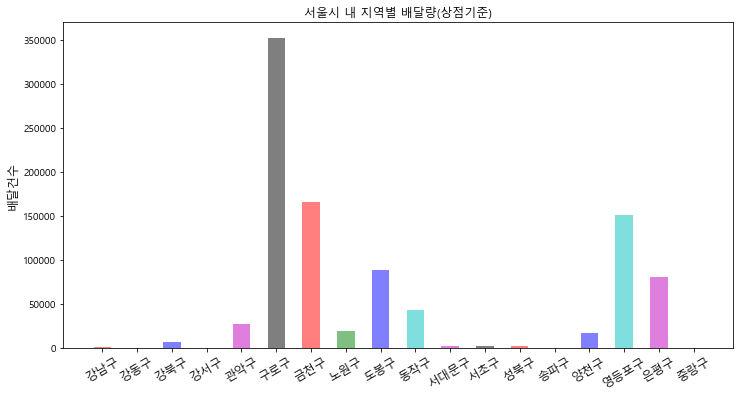

In [474]:
# 서울시 내 지역별 배달량(상점기준) 분석.
len(deliv_data['DLVR_STORE_SIGNGU_NM'].unique())
region_by_store = deliv_data[(deliv_data['DLVR_REQUST_STTUS_VALUE']==1) & (deliv_data['DLVR_STORE_BRTC_NM']=='서울특별시')].groupby('DLVR_STORE_SIGNGU_NM')['DLVR_REQUST_STTUS_VALUE'].count()
region_by_store

sizes=12
plt.figure(figsize=(12,6))
plt.bar(region_by_store.index,region_by_store.values,color=colors,alpha=0.5,width=0.5)
plt.xticks(rotation=30,size=sizes)
plt.ylabel('배달건수',size=sizes)
plt.title('서울시 내 지역별 배달량(상점기준)',size=sizes)
plt.show()

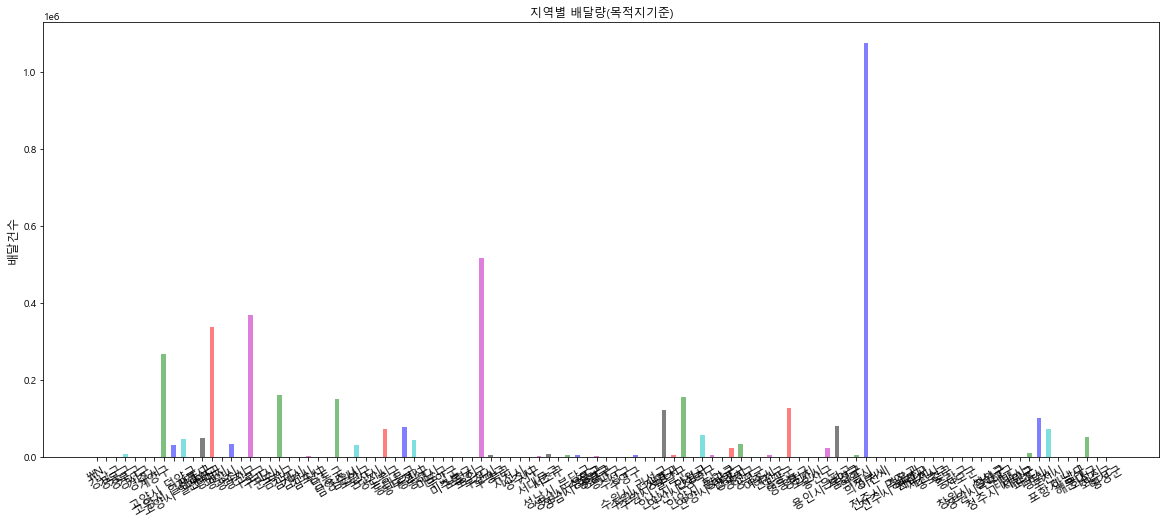

In [16]:
# 지역별 배달량(목적지기준) 분석.
len(deliv_data['DLVR_DSTN_SIGNGU_NM'].unique())
region_by_dst = deliv_data[deliv_data['DLVR_REQUST_STTUS_VALUE']==1].groupby('DLVR_DSTN_SIGNGU_NM')['DLVR_REQUST_STTUS_VALUE'].count()
region_by_dst

sizes=12
plt.figure(figsize=(20,8))
plt.bar(region_by_dst.index,region_by_dst.values,color=colors,alpha=0.5,width=0.5)
plt.xticks(rotation=30,size=sizes)
plt.ylabel('배달건수',size=sizes)
plt.title('지역별 배달량(목적지기준)',size=sizes)
plt.show()

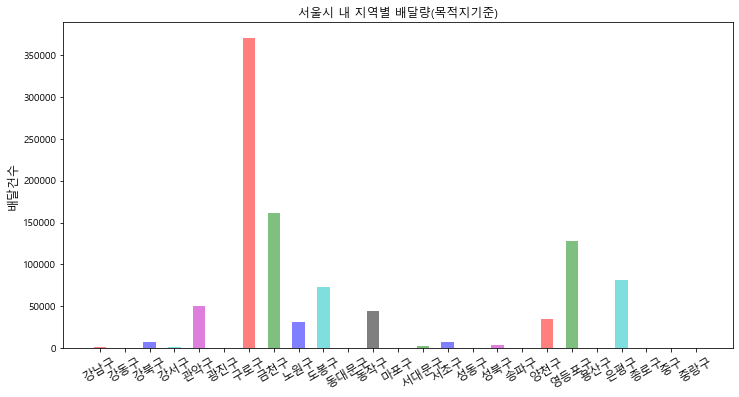

In [17]:
# 서울시 내 지역별 배달량(목적지기준) 분석.
len(deliv_data['DLVR_DSTN_SIGNGU_NM'].unique())
region_by_dst = deliv_data[(deliv_data['DLVR_REQUST_STTUS_VALUE']==1) & (deliv_data['DLVR_DSTN_BRTC_NM']=="서울특별시")].groupby('DLVR_DSTN_SIGNGU_NM')['DLVR_REQUST_STTUS_VALUE'].count()
region_by_dst

sizes=12
plt.figure(figsize=(12,6))
plt.bar(region_by_dst.index,region_by_dst.values,color=colors,alpha=0.5,width=0.5)
plt.xticks(rotation=30,size=sizes)
plt.ylabel('배달건수',size=sizes)
plt.title('서울시 내 지역별 배달량(목적지기준)',size=sizes)
plt.show()

In [18]:
# 경기도 ,서울특별시 내 배달 횟수.
pre = deliv_data[deliv_data['DLVR_REQUST_STTUS_VALUE']==1]
pre.pivot_table(index='DLVR_STORE_BRTC_NM',values='DLVR_REQUST_STTUS_VALUE',aggfunc='count')

,DLVR_REQUST_STTUS_VALUE
DLVR_STORE_BRTC_NM,
경기도,3256002
서울특별시,964990


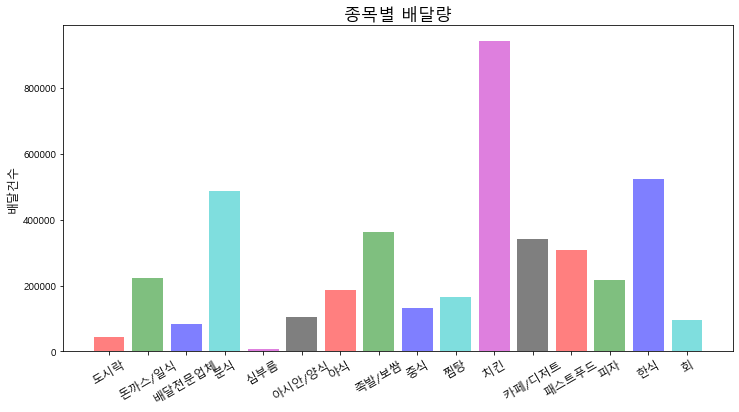

In [19]:
# 종목별 배달량 추이 분석.
len(deliv_data['DLVR_STORE_INDUTY_NM'].unique())
object_by = deliv_data[deliv_data['DLVR_REQUST_STTUS_VALUE']==1].groupby('DLVR_STORE_INDUTY_NM')['DLVR_REQUST_STTUS_VALUE'].count()
object_by

plt.figure(figsize=(12,6))
plt.bar(object_by.index,object_by.values,color=colors,alpha=0.5)
plt.xticks(rotation=30,size=sizes)
plt.title('종목별 배달량',size=sizes+5)
plt.ylabel('배달건수',size=sizes)
plt.show()

AttributeError: 'Line2D' object has no property 'line_style'

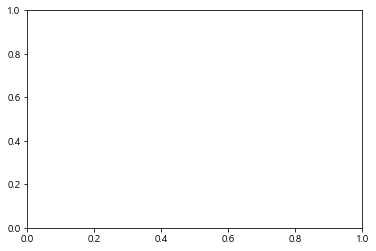

In [20]:
# 시각화 문법.

plt.figure(1) or plt.subplot(2,2,1)
plt.plot(x,y,color='r',line_style=':',marker='o')
plt.xlabel()
plt.ylabel()
plt.title()
plt.legend(['data1','data2'],loc='lower right')
plt.grid(True)
plt.show()

plt.scatter(x,y,s=500,c='r')
colors=['r','g','b','c','m','k','y']
for x,y,name in zip(lon,lat,name):
    plt.text(x,y,name)

plt.bar(x,height,widhth,color,tick_label,align,label)

In [542]:
deliv_data.head(4)

,PROCESS_DT,DLVR_REQUST_STTUS_VALUE,DLVR_STORE_INDUTY_NM,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_RDNMADR_CODE,...,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,year,month
PROCESS_DT,,,,,,,,,,,,,,,,,,,,,
2019-12-01,2019-12-01,1,족발/보쌈,서울특별시,영등포구,신길동,서울특별시,동작구,대방동,115904157098,...,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N,2019,12
2019-12-01,2019-12-01,1,치킨,경기도,고양시 일산동구,중산동,경기도,고양시 일산동구,중산동,412853193037,...,21900,1,승인:현대카드사,2019-12-01 21:58:07,2019-12-01 22:01:06,2019-12-01 22:20:53,2019-12-01 22:26:01,\N,2019,12
2019-12-01,2019-12-01,1,치킨,경기도,의정부시,의정부동,경기도,의정부시,녹양동,411504343083,...,19500,2,,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N,2019,12
2019-12-01,2019-12-01,1,돈까스/일식,경기도,고양시 일산동구,장항동,경기도,고양시 일산동구,마두동,412854379158,...,18000,2,,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57,\N,2019,12


TypeError: cannot do slice indexing on DatetimeIndex with these indexers [0] of type int

In [43]:
def inputNumbers1():
    numbers = []
    while True:
        num=int(input('Input a number : '))
        if num <=0:
            numbers.reverse()
            return numbers
            break
        numbers.append(num)
a = inputNumbers1()        
print(a)

Input a number : 4
Input a number : 3
Input a number : 2
Input a number : 1
Input a number : 0
[1, 2, 3, 4]


In [40]:
a=[1,2,3]
a.reverse()
a

[3, 2, 1]